In [76]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***EJERCICIO UNO***

In [77]:
# Cargar datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columnas)

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [78]:
# Separar características y objetivo
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)  # Controlamos la profundidad para evitar overfitting
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [80]:
# Predecir y evaluar
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.7489177489177489

Matriz de confusión:
 [[129  22]
 [ 36  44]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       151
           1       0.67      0.55      0.60        80

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



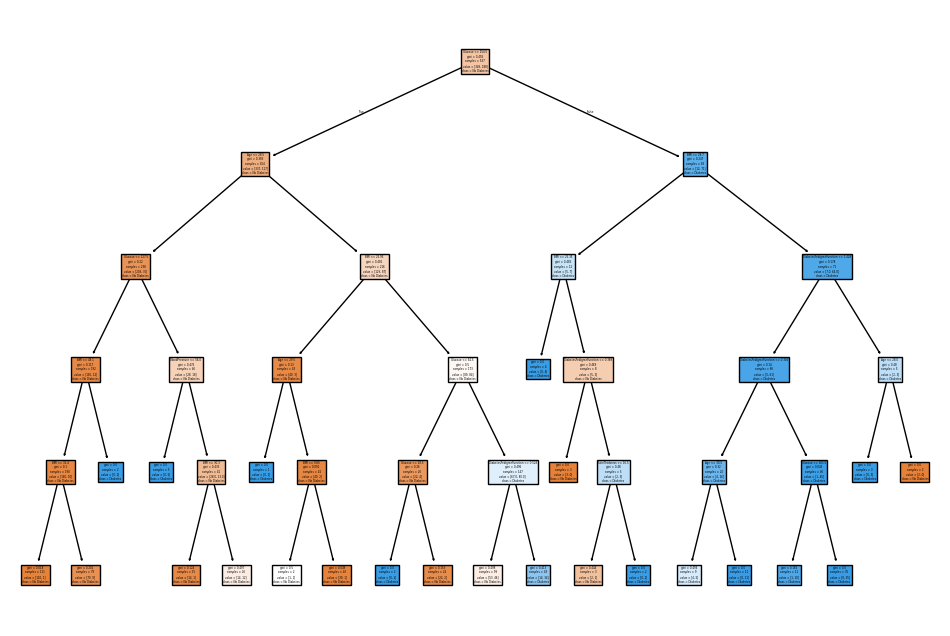

In [81]:
# Visualización del árbol 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(modelo, feature_names=columnas[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

***EJERCICIO DOS***

In [82]:
# Generar datos sintéticos
X, y = make_classification(n_samples=500, n_features=6, n_informative=3, random_state=42)


In [83]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)  # Parámetros para controlar complejidad
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)

In [85]:
# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.94

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.96      0.92      0.94        76

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



***EJERCICIO TRES***

In [86]:
# Cargar datos
url = "https://raw.githubusercontent.com/arib168/data/main/Social_Network_Ads.csv"
data = pd.read_csv(url)
print(data.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [87]:
# Seleccionar características y objetivo
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [88]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [90]:
# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Exactitud: 0.9333333333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.88      0.96      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120


Matriz de Confusión:
[[67  6]
 [ 2 45]]


d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


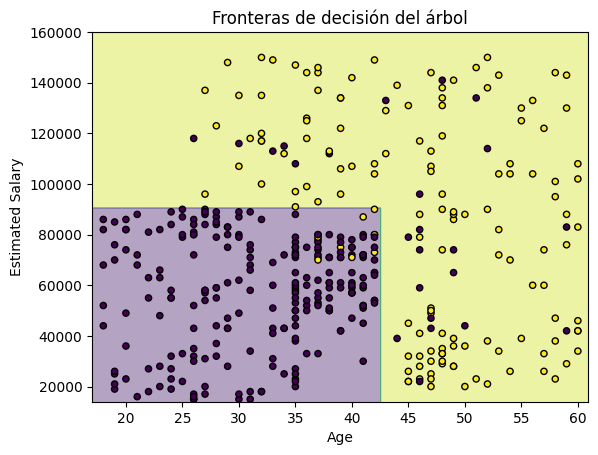

In [91]:
# Visualización de fronteras de decisión 
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 10003
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 100))

Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['Age'], X['EstimatedSalary'], c=y, s=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Fronteras de decisión del árbol')
plt.show()

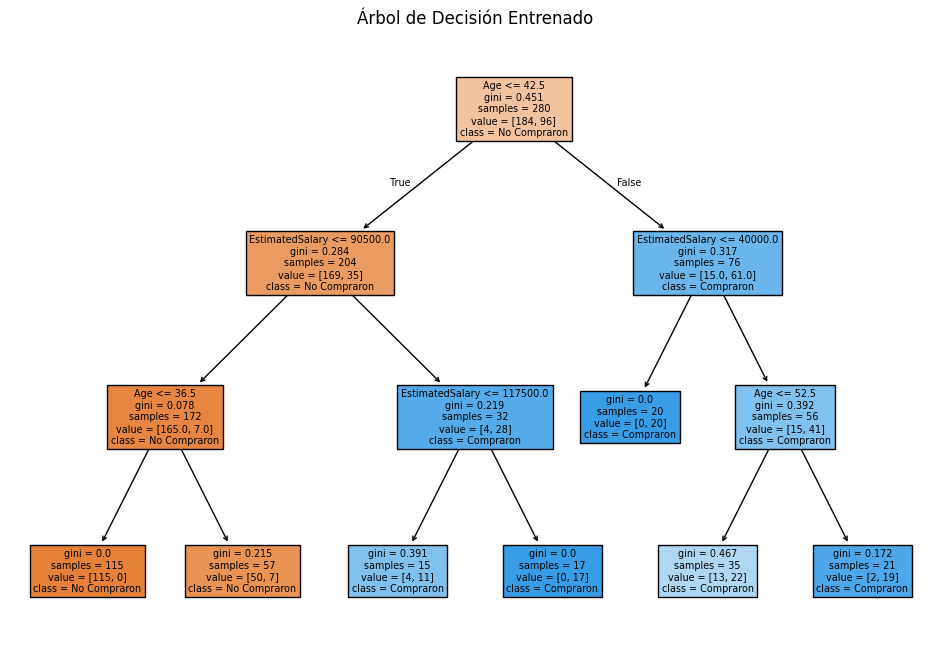

In [92]:
# Visualización del árbol de decisión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(modelo, feature_names=['Age', 'EstimatedSalary'],
          class_names=['No Compraron', 'Compraron'], filled=True)
plt.title('Árbol de Decisión Entrenado')
plt.show()


In [93]:
def predecir_compra_arbol(edad, salario):
    # Crear dataframe con los datos nuevos
    datos_nuevos = pd.DataFrame([[edad, salario]], columns=['Age', 'EstimatedSalary'])
    
    # Predecir con el modelo de árbol
    prediccion = modelo.predict(datos_nuevos)
    probabilidad = modelo.predict_proba(datos_nuevos)[0][1]  # probabilidad de comprar (clase 1)
    
    if prediccion[0] == 1:
        print(f"\nPredicción: COMPRARÁ (Probabilidad: {probabilidad:.2%})")
        print("Factores clave:")
        if edad > 42:
            print("- Edad mayor a 42 años aumenta probabilidad")
        if salario > 90000:
            print("- Salario alto (>90k) aumenta probabilidad")
    else:
        print(f"\nPredicción: NO COMPRARÁ (Probabilidad: {probabilidad:.2%})")
        print("Factores clave:")
        if edad <= 42:
            print("- Edad menor o igual a 42 años reduce probabilidad")
        if salario <= 90000:
            print("- Salario bajo (≤90k) reduce probabilidad")

# Ejemplo interactivo
print("\n=== PREDICCIÓN DE COMPRA ===")
try:
    edad_input = float(input("Ingresa la edad del cliente: "))
    salario_input = float(input("Ingresa el salario estimado del cliente: "))
    
    print(f"\nDatos ingresados - Edad: {edad_input}, Salario: {salario_input}")
    predecir_compra_arbol(edad_input, salario_input)
    
except ValueError:
    print("Error: Por favor ingresa valores numéricos válidos")


=== PREDICCIÓN DE COMPRA ===
Error: Por favor ingresa valores numéricos válidos


***EJERCICIO CUATRO***

In [94]:
# Cargar datos
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [95]:
from sklearn.preprocessing import LabelEncoder

# Preprocesamiento básico
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])


In [96]:
# Separar características y objetivo
X = data.drop('Survived', axis=1)
y = data['Survived']


In [97]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [98]:
# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.772093023255814

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       126
           1       0.73      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [99]:
# Importancia de características
print("\nImportancia de características:")
for name, importance in zip(X.columns, modelo.feature_importances_):
    print(f"{name}: {importance:.3f}")


Importancia de características:
Pclass: 0.253
Sex: 0.497
Age: 0.184
Fare: 0.066


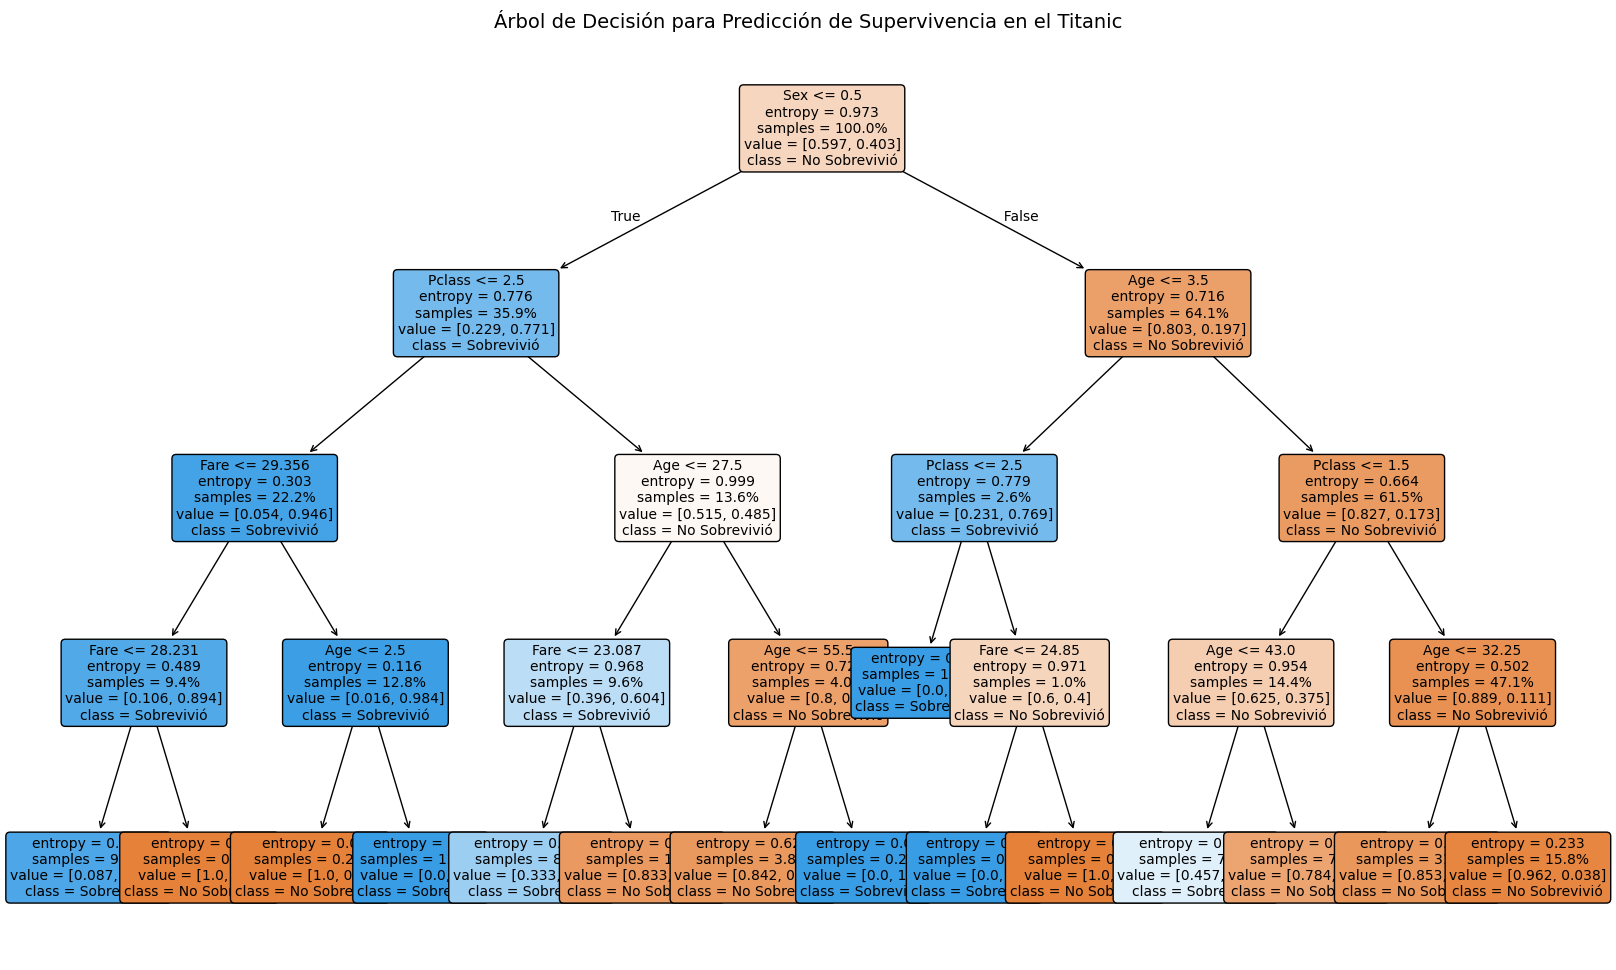

In [100]:
plt.figure(figsize=(20,12))
plot_tree(modelo, 
          feature_names=X.columns, 
          class_names=['No Sobrevivió', 'Sobrevivió'], 
          filled=True, 
          rounded=True, 
          proportion=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción de Supervivencia en el Titanic", fontsize=14)
plt.show()


In [101]:
def predecir_supervivencia():
    print("\n=== PREDICCIÓN MANUAL ===")
    print("Ingrese los datos del pasajero:")
    
    try:
        # Solicitar datos al usuario
        pclass = int(input("Clase (1, 2 o 3): "))
        sex = input("Sexo (male/female): ").lower()
        age = float(input("Edad: "))
        fare = float(input("Tarifa pagada: "))
        
        # Preprocesar los datos de entrada
        sex_encoded = 1 if sex == 'male' else 0
        
        # Crear dataframe con los datos ingresados
        datos_usuario = pd.DataFrame({
            'Pclass': [pclass],
            'Sex': [sex_encoded],
            'Age': [age],
            'Fare': [fare]
        })
        
        # Realizar predicción
        prediccion = modelo.predict(datos_usuario)
        probabilidad = modelo.predict_proba(datos_usuario)
        
        # Mostrar resultados
        print("\nResultado de la predicción:")
        print(f"• Sobreviviría: {'Sí' if prediccion[0] == 1 else 'No'}")
        print(f"• Probabilidades: No ({probabilidad[0][0]*100:.1f}%), Sí ({probabilidad[0][1]*100:.1f}%)")
        
        # Interpretación adicional
        if prediccion[0] == 1:
            print("\nFactores que contribuyeron a esta predicción:")
            if sex_encoded == 0: print("- Ser mujer aumentó la probabilidad de supervivencia")
            if pclass == 1: print("- Viajar en primera clase aumentó la probabilidad")
            if age < 18: print("- Ser niño aumentó la probabilidad")
        else:
            print("\nFactores que contribuyeron a esta predicción:")
            if sex_encoded == 1: print("- Ser hombre disminuyó la probabilidad")
            if pclass == 3: print("- Viajar en tercera clase disminuyó la probabilidad")
        
    except ValueError:
        print("Error: Por favor ingrese valores numéricos válidos")

# Ejecutar la función de predicción
while True:
    predecir_supervivencia()
    continuar = input("\n¿Desea realizar otra predicción? (s/n): ").lower()
    if continuar != 's':
        break


=== PREDICCIÓN MANUAL ===
Ingrese los datos del pasajero:
Error: Por favor ingrese valores numéricos válidos


***EJERCICIO CINCO***